# **Statistical  & Probability Notebook : House Prices - Advanced Regression Techniques**

## **Part 1**

In [1]:
# for basic operations
import numpy as np 
import pandas as pd 

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the data
data = pd.read_csv('/content/sample_data/dataset.csv')

# check the shape of the dataset
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# let's check the columns in the dataset
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

 **Dataset**

I have choosen one of the most famous datasets, **House Prices - Advanced Regression Techniques**, and plotted the statistical and probable analysis for the same, using various theorums.
There are many columns, some of which are:

SalePrice — the property’s sale price in dollars. This is the target variable that we are trying to predict.

LotFrontage — Linear feet of street connected to property

LotArea — Lot size in square feet

Street — Type of road access

LotShape — General shape of property

LandContour — Flatness of the property

Utilities — Type of utilities available

LotConfig — Lot configuration 

## Statistical Inference

### Sample Mean and population Mean

**Consider a sample of 500 houses at random from 1460 houses and find it's mean SalePrice and compare it with mean SalePrice of whole dataset.**

In [5]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)

# lets take 500 sample values from the dataset of 1460 values
sample_ages = np.random.choice(a= data['SalePrice'], size=500)

# getting the sample mean
print ("Sample mean:", sample_ages.mean() )          

# getting the population mean
print("Population mean:", data['SalePrice'].mean())

# difference in both mean
print("Difference in mean:", (data['SalePrice'].mean() -  sample_ages.mean()))

Sample mean: 177499.802
Population mean: 180921.19589041095
Difference in mean: 3421.3938904109527


Here, we found that the mean SalePrice of Sample taken randomly of 500 houses, differs from that of total dataset, by the amount shown in result.

### **Central Limit Theorem**

The central limit theorem tells us that no matter what the distribution of the population is, the shape of the sampling distribution will approach normality as the sample size (N) increases.

**Assumptions Behind the Central Limit Theorem**



1. The data must follow the randomization condition, that is it must be sampled randomly
2. Samples should be independent of each other. One sample should not influence the other samples
3. Sample size should be not more than 10% of the population when sampling is done without replacement
4. The sample size should be sufficiently large. When the population is skewed or asymmetric, the sample size should be large. If the population is symmetric, then we can draw small samples as well. 
In general, a sample size of 30 is considered sufficient when the population is symmetric.

**Formula**



The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, **the mean of all samples from the same population will be approximately equal to the mean of the population.**

$ \mu_\bar{x}=\mu $

where,

$\mu_\bar{x}$ =  Mean of the sample means

µ     =  Population mean






Further, all of the samples will follow an approximate normal distribution pattern, with **all variances being approximately equal to the variance of the population divided by each sample's size.**

$ \sigma_\bar{x}=\frac{\sigma }{\sqrt{n}} $ 
 
where,

$\sigma_\bar{x}$ = Standard deviation of the sample mean

σ     = Population standard deviation

n     = sample size

**Asymptotic Behaviour**

“Asymptotic” refers to how an estimator behaves as the sample size gets larger (i.e. tends to infinity). “Normality” refers to the normal distribution, so an estimator that is asymptotically normal will have an approximately normal distribution as the sample size gets infinitely large.

The central limit theorem gives only an asymptotic distribution. As an approximation for a finite number of observations, it provides a reasonable approximation only when close to the peak of the normal distribution and it requires a very large number of observations to stretch into the tails.

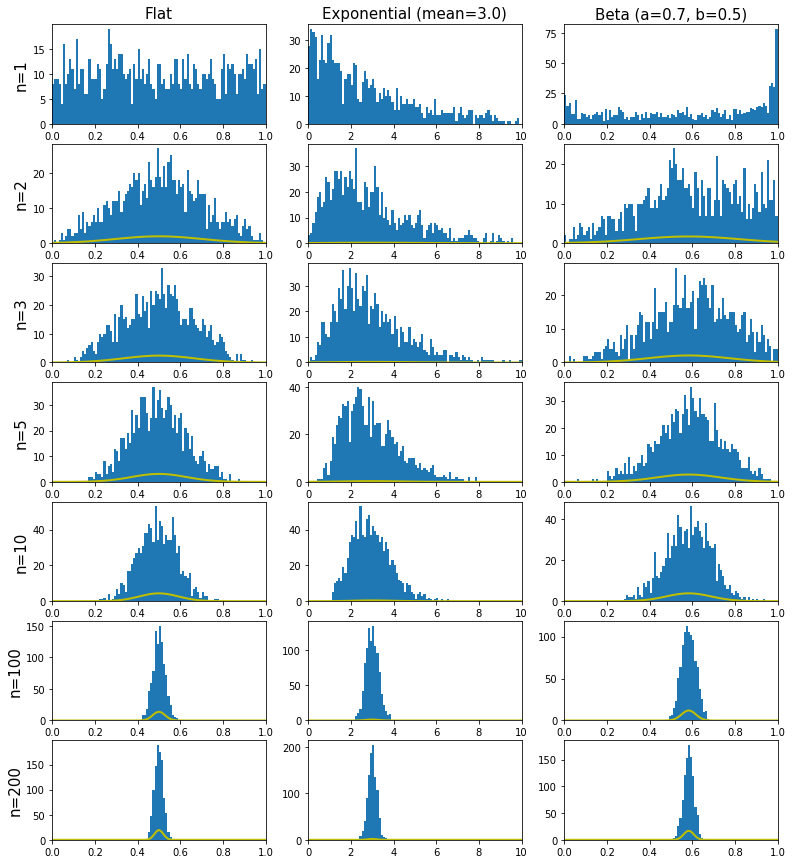

In [6]:

# provides capability to define function with partial arguments
from functools import partial

# number of samples to average over.
n=np.array([1, 2, 3, 5, 10, 100, 200])

# number of times samples of size n are taken. Try varying this number.
N = 1000

# number of bin boundaries on plots
nobb=101

# mean of exponential distribution
exp_mean=3

# parameters of beta distribution
a,b=0.7,0.5 

dist=[partial(np.random.random), 
      partial(np.random.exponential, exp_mean),
      partial(np.random.beta, a, b)]

# lets define the title names.
title_names=["Flat",
             "Exponential (mean=%.1f)" % exp_mean, 
             "Beta (a=%.1f, b=%.1f)" % (a,b)]

# ranges of the three distributions
drange=np.array([[0,1],[0,10],[0,1]]) 

# means of the three distributions
means=np.array([0.5,exp_mean,a/(a+b)])

# variances of the three distributions
var=np.array([1/12,exp_mean**2,a*b/((a+b+1)*(a+b)**2)]) 

# generates random samples in the specified ranges for the respective distributions.
binrange=np.array([np.linspace(p,q,nobb) for p,q in drange]) 
ln,ld=len(n),len(dist)
plt.figure(figsize=((ld*4)+1,(ln*2)+1))

 # loop over number of n samples to average over
for i in range(ln):
     # loop over the different distributions
    for j in range(ld):
        plt.subplot(ln,ld,i*ld+1+j)
        plt.hist(np.mean(dist[j]((N,n[i])),1),binrange[j])
        plt.xlim(drange[j])
        if j==0:
            plt.ylabel('n=%i' % n[i],fontsize=15)        
        if i==0:
            plt.title(title_names[j], fontsize=15)
        else:
            clt=(1/(np.sqrt(2*np.pi*var[j]/n[i])))*np.exp(-(((binrange[j]-means[j])**2)*n[i]/(2*var[j])))
            plt.plot(binrange[j],clt,'y',linewidth=2)     
plt.show()

**Inference from graph**

Here, we get a good bell-shaped curve and the sampling distribution approaches normal distribution as the sample sizes increase. Therefore, we can consider the sampling distributions as normal and can use these distributions for further analysis.

In the graphs above the yellow curve is the predicted Gaussian distribution from the Central Limit Thereom. The rate of convergence of the sample mean to the Gaussian depends on the original parent distribution. 

Also, the mean of Gaussian distribution is the same as the original parent distribution, the width of Gaussian distribution varies with sample size as  1/√n .

### **Confidence Interval**

Confidence Interval (CI) is a type of estimation computed from the statistics of the observed data. This proposes the range of plausible values for an unknown parameter (for example, the mean). The interval has got an associated confidence level that the true parameter is in the proposed range.

The confidence interval of the mean of a measurement variable is commonly estimated on the assumption that the statistic follows a normal distribution, and that the variance is therefore independent of the mean. This is known as a normal approximation confidence interval.

**Assumptions Behind the Confidence Interval Theorem**

1. Randomization Condition: The data must be sampled randomly.
2. Independence Assumption: The sample values must be independent of each other and the occurrence of one event has no influence on the next event.
3. 10% Condition: When the sample is drawn without replacement the sample size and n should be no more than 10% of the population.
4. Estimate the variability of mean but not directly.
Sample means may be normally distributed, estimate of the standard error is a sample statistic, and therefore subject to error. This error is worst for small sample sizes, and results in  estimated confidence interval being too narrow. Hence use the t-correction for small samples (always for n < 30; preferably for n < 100).

**Formula**

$ CI = \bar{x} \bar{+}  \frac{s}{\sqrt{n}} $

where,

CI	=	confidence interval

$\bar{x}$	=	sample mean

z	=	confidence level value

s	=	sample standard deviation

n	=	sample size

In [7]:
# lets import the scipy package
import scipy.stats as stats
import math

# lets seed the random values
np.random.seed(10)

# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= data['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)  

 # Check the z-critical value  
print("z-critical value: ",z_critical)                                

# Get the population standard deviation
pop_stdev = data['SalePrice'].std()  

# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['SalePrice'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (178338.05201966673, 186602.42998033328)
True mean: 180921.19589041095


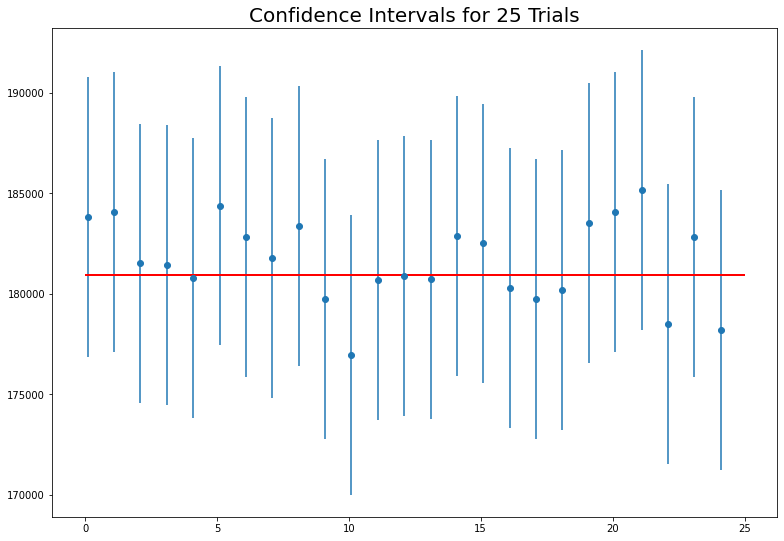

In [8]:

sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

     # Get the z-critical value* 
    z_critical = stats.norm.ppf(q = 0.975)         

    # Get the population standard deviation
    pop_stdev = data['SalePrice'].std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 25 Trials', fontsize = 20)
plt.show()


**Inference from graph**

The true mean is contained in our interval.
A confidence interval of 95% would mean that if we take many samples and create confidence intervals for each of them, 95% of our samples' confidence intervals will contain the true population mean.


Here, in graph it is easily visible that 95% of the times the blue lines(the sample meean) overlaps with the red line(the true mean), also 5% of the times it is expected to not overlap with the red line(the true mean).